**Importing Libraries**

In [142]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sn
from statsmodels.graphics.regressionplots import influence_plot
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import r2_score
from sklearn.preprocessing import quantile_transform

**Importing Data**

In [143]:
from google.colab import files 
uploaded=files.upload()

Saving 50_Startups.csv to 50_Startups (4).csv


In [144]:
data=pd.read_csv('50_Startups.csv')

In [145]:
data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [146]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [147]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [148]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


**Data Cleaning Steps**

**Duplicate Rows:**

In [149]:
data.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
dtype: bool

In [150]:
data[data.duplicated()].shape

(0, 5)

In [151]:
data[data.duplicated()]

,R&D Spend,Administration,Marketing Spend,State,Profit


**Missing Values:**

In [152]:
data.isnull().any()

R&D Spend          False
Administration     False
Marketing Spend    False
State              False
Profit             False
dtype: bool

In [153]:
data.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

**Rename the Columns:**

In [154]:
data=data.rename(columns={'R&D Spend':'RDS','Marketing Spend':'MS'})

In [155]:
data.head()

,RDS,Administration,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


**Correlation**

In [156]:
data.corr()

,RDS,Administration,MS,Profit
RDS,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
MS,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


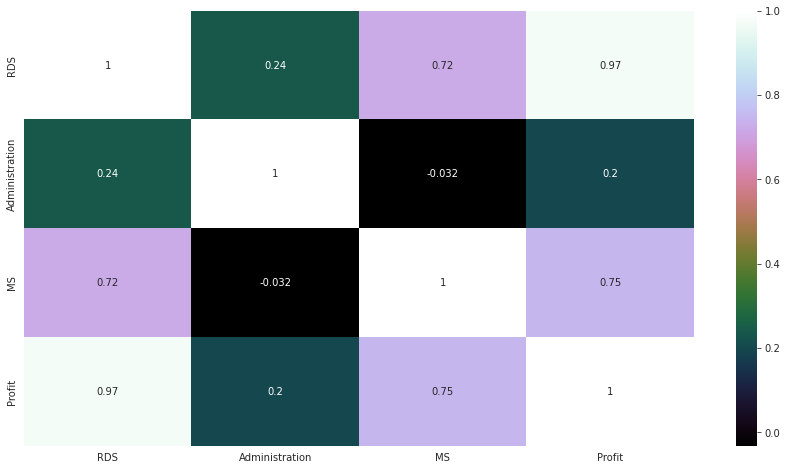

In [157]:
plt.figure(figsize=(15,8))
sns.heatmap(data=data.corr(), annot=True, cmap='cubehelix')

**Scatterplot between variables along with histograms**

<Figure size 1008x576 with 0 Axes>

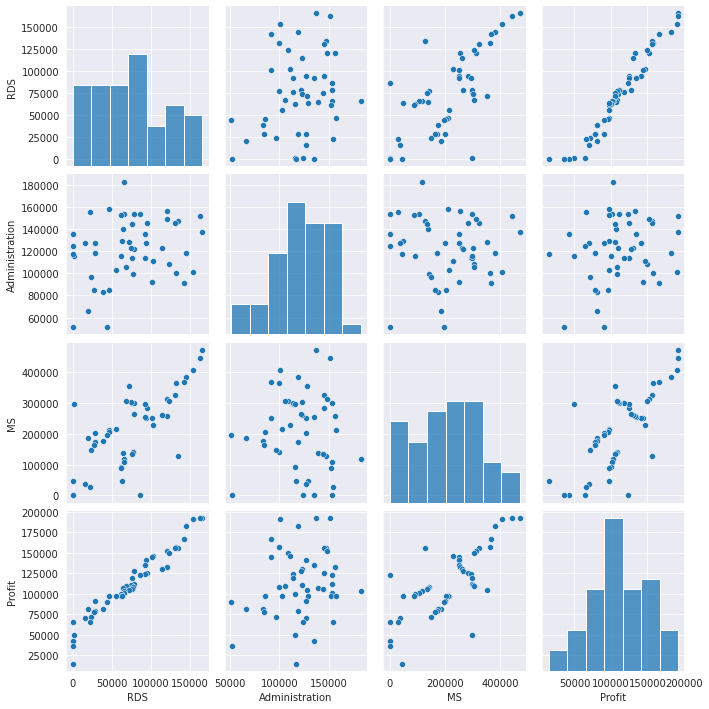

In [158]:
plt.figure(figsize=(14,8))
sns.set_style(style='darkgrid')
sns.pairplot(data)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


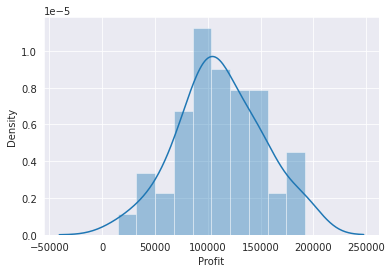

In [159]:
sns.distplot(data.Profit, bins = 10) 

**Transformation**

**Dummification**

In [160]:
data1=pd.get_dummies(data['State'])

In [161]:
data1.head()

,California,Florida,New York
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,0,1,0


In [162]:
data=pd.concat([data,data1],axis=1)
data.head()

,RDS,Administration,MS,State,Profit,California,Florida,New York
0,165349.20,136897.80,471784.10,New York,192261.83,0,0,1
1,162597.70,151377.59,443898.53,California,191792.06,1,0,0
2,153441.51,101145.55,407934.54,Florida,191050.39,0,1,0
3,144372.41,118671.85,383199.62,New York,182901.99,0,0,1
4,142107.34,91391.77,366168.42,Florida,166187.94,0,1,0


In [163]:
data.drop(['State'],axis=1,inplace=True)

In [164]:
data.head()

,RDS,Administration,MS,Profit,California,Florida,New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [165]:
renamed_data=data.rename(columns={'New York':'NY'})

In [166]:
renamed_data.head()

,RDS,Administration,MS,Profit,California,Florida,NY
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


**Standardizing the Values**

In [167]:
renamed_data.iloc[:,0:4]=StandardScaler().fit_transform(renamed_data.iloc[:,0:4])

In [169]:
renamed_data.head()

,RDS,Administration,MS,Profit,California,Florida,NY
0,2.016411,0.560753,2.153943,2.011203,0,0,1
1,1.955860,1.082807,1.923600,1.999430,1,0,0
2,1.754364,-0.728257,1.626528,1.980842,0,1,0
3,1.554784,-0.096365,1.422210,1.776627,0,0,1
4,1.504937,-1.079919,1.281528,1.357740,0,1,0


In [170]:
model=smf.ols('Profit~RDS+Administration+MS+California+Florida+NY',data=renamed_data).fit()

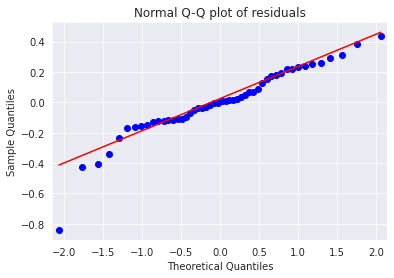

In [171]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [172]:
model.params

Intercept         0.000055
RDS               0.917931
Administration   -0.018771
MS                0.081858
California       -0.001292
Florida           0.003690
NY               -0.002342
dtype: float64

In [173]:
model.pvalues,model.tvalues

(Intercept         9.982595e-01
 RDS               2.578772e-21
 Administration    6.077373e-01
 MS                1.226769e-01
 California        9.788318e-01
 Florida           9.414663e-01
 NY                9.612778e-01
 dtype: float64, Intercept          0.002194
 RDS               17.368580
 Administration    -0.517012
 MS                 1.573889
 California        -0.026685
 Florida            0.073848
 NY                -0.048827
 dtype: float64)

In [174]:
#Standardized Model R squared value
model.rsquared

0.9507524843355148

In [175]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Wed, 04 Jan 2023   Prob (F-statistic):           1.34e-27
Time:                        14:20:00   Log-Likelihood:                 4.3255
No. Observations:                  50   AIC:                             3.349
Df Residuals:                      44   BIC:                             14.82
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.507e-05      0.025      0.002      0.998      -0.051       0.051
RDS                0.9179      0.053     17.369      0.000       0.811       1.024
Administration    -0.0188      0.036     -0.517      0.608      -0.092       0.054
MS                 0.0819      0.052      1.574      0.123      -0.023       0.187
California        -0.0013      0.048     -0.027      0.979      -0.099       0.096
Florida            0.0037      0.050      0.074      0.941      -0.097       0.104
NY                -0.0023      0.048     -0.049      0.961      -0.099       0.094
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     2.39e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.54e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

**Power Transformation**

In [176]:
renamed_data1=data.rename(columns={"R&D Spend":"RDS","Marketing Spend":"MS","New York":"NY"})
renamed_data1.head()

,RDS,Administration,MS,Profit,California,Florida,NY
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [177]:
renamed_data1.iloc[:,0:4]=PowerTransformer().fit_transform(renamed_data1.iloc[:,0:4])
renamed_data1.head()

,RDS,Administration,MS,Profit,California,Florida,NY
0,1.562570,0.529102,1.580363,1.987125,0,0,1
1,1.527028,1.131285,1.451634,1.975666,1,0,0
2,1.406784,-0.790378,1.279964,1.957572,0,1,0
3,1.284497,-0.174305,1.157809,1.758577,0,0,1
4,1.253427,-1.106257,1.071572,1.349158,0,1,0


In [178]:
model1=smf.ols('Profit~RDS+Administration+MS+California+Florida+NY',data=renamed_data1).fit()

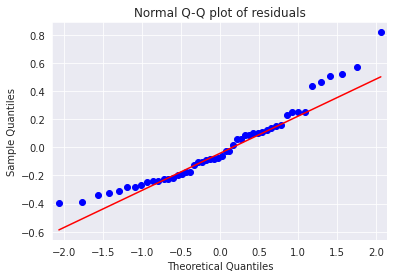

In [179]:
import statsmodels.api as sm
qqplot=sm.qqplot(model1.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [180]:
model.params

Intercept         0.000055
RDS               0.917931
Administration   -0.018771
MS                0.081858
California       -0.001292
Florida           0.003690
NY               -0.002342
dtype: float64

In [181]:
#Rsquared values for Power transformed data
model1.rsquared

0.9261238528744843

In [182]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     110.3
Date:                Wed, 04 Jan 2023   Prob (F-statistic):           9.67e-24
Time:                        14:24:05   Log-Likelihood:                -5.8128
No. Observations:                  50   AIC:                             23.63
Df Residuals:                      44   BIC:                             35.10
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.0003      0.031     -0.010      0.992      -0.062       0.062
RDS                0.9272      0.062     14.890      0.000       0.802       1.053
Administration    -0.0340      0.045     -0.761      0.451      -0.124       0.056
MS                 0.0602      0.062      0.975      0.335      -0.064       0.185
California        -0.0081      0.059     -0.137      0.892      -0.127       0.111
Florida           -0.0213      0.062     -0.345      0.732      -0.146       0.103
NY                 0.0291      0.059      0.490      0.627      -0.091       0.149
==============================================================================
Omnibus:                        7.209   Durbin-Watson:                   1.003
Prob(Omnibus):                  0.027   Jarque-Bera (JB):                6.489
Skew:                           0.865   Prob(JB):                       0.0390
Kurtosis:                       3.348   Cond. No.                     9.35e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.9e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

**Quantile Transformation**

In [183]:
renamed_data2=data.rename(columns={"R&D Spend":"RDS","Marketing Spend":"MS","New York":"NY"})
renamed_data2.head()

,RDS,Administration,MS,Profit,California,Florida,NY
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [184]:
from sklearn.preprocessing import QuantileTransformer
qt = QuantileTransformer(random_state=0)
qtdf = qt.fit_transform(renamed_data2)
qtdf = qt.transform(renamed_data2)
df_qtdata = pd.DataFrame(data=qtdf, columns=['RDS','Administration','MS','Profit','California','Florida','NY'])
df_qtdata.head()

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_data.py:2590: UserWarning: n_quantiles (1000) is greater than the total number of samples (50). n_quantiles is set to n_samples.
  warnings.warn(


,RDS,Administration,MS,Profit,California,Florida,NY
0,1.000000,0.693878,1.000000,1.000000,0.0,0.0,1.0
1,0.979592,0.836735,0.979592,0.979592,1.0,0.0,0.0
2,0.959184,0.224490,0.959184,0.959184,0.0,1.0,0.0
3,0.938776,0.448980,0.938776,0.938776,0.0,0.0,1.0
4,0.918367,0.122449,0.918367,0.918367,0.0,1.0,0.0


In [185]:
model2=smf.ols('Profit~RDS+Administration+MS+California+Florida+NY',data=df_qtdata).fit()

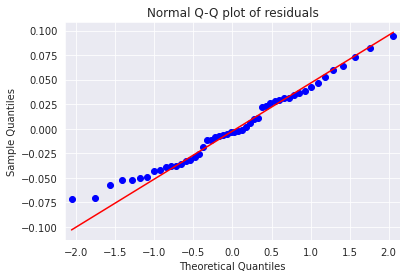

In [186]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
qqplot=sm.qqplot(model2.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [187]:
model2.predict(df_qtdata)

0     0.990379
1     0.981483
2     0.965330
3     0.932541
4     0.925919
5     0.875303
6     0.881170
7     0.855575
8     0.805528
9     0.845642
10    0.753425
11    0.740746
12    0.691484
13    0.675110
14    0.786364
15    0.764438
16    0.600491
17    0.702498
18    0.658582
19    0.601428
20    0.565251
21    0.603547
22    0.520000
23    0.484379
24    0.560935
25    0.407929
26    0.521677
27    0.492519
28    0.437518
29    0.409560
30    0.365864
31    0.329380
32    0.385047
33    0.337546
34    0.311161
35    0.289455
36    0.212587
37    0.283369
38    0.129980
39    0.261500
40    0.235968
41    0.196305
42    0.179014
43    0.093484
44    0.141193
45    0.053504
46    0.103772
47    0.004059
48    0.038991
49    0.011073
dtype: float64

In [188]:
model2.rsquared

0.9809278743307759

In [189]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     452.6
Date:                Wed, 04 Jan 2023   Prob (F-statistic):           1.21e-36
Time:                        14:27:46   Log-Likelihood:                 89.164
No. Observations:                  50   AIC:                            -166.3
Df Residuals:                      44   BIC:                            -154.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.0054      0.013      0.432      0.668      -0.020       0.031
RDS                0.9710      0.032     30.552      0.000       0.907       1.035
Administration    -0.0139      0.023     -0.618      0.540      -0.059       0.032
MS                 0.0294      0.032      0.933      0.356      -0.034       0.093
California         0.0077      0.009      0.838      0.406      -0.011       0.026
Florida            0.0035      0.010      0.338      0.737      -0.017       0.024
NY                -0.0058      0.010     -0.593      0.556      -0.025       0.014
==============================================================================
Omnibus:                        2.004   Durbin-Watson:                   2.535
Prob(Omnibus):                  0.367   Jarque-Bera (JB):                1.605
Skew:                           0.272   Prob(JB):                        0.448
Kurtosis:                       2.311   Cond. No.                     1.58e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.25e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

**Log Transformation**

In [190]:
renamed_data3=data.rename(columns={"R&D Spend":"RDS","Marketing Spend":"MS","New York":"NY"})
renamed_data3.head()

,RDS,Administration,MS,Profit,California,Florida,NY
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [202]:
log_data=renamed_data.copy()

In [203]:
log_data.head()

,RDS,Administration,MS,Profit,California,Florida,NY
0,2.016411,0.560753,2.153943,2.011203,0,0,1
1,1.955860,1.082807,1.923600,1.999430,1,0,0
2,1.754364,-0.728257,1.626528,1.980842,0,1,0
3,1.554784,-0.096365,1.422210,1.776627,0,0,1
4,1.504937,-1.079919,1.281528,1.357740,0,1,0


In [206]:
log_data=renamed_data3[['RDS','Administration','MS','Profit']].apply(np.log)

In [207]:
log_data=pd.concat([log_data,data1],axis=1)

In [208]:
log_data

,RDS,Administration,MS,Profit,California,Florida,New York
0,12.015815,11.826990,13.064277,12.166613,0,0,1
1,11.999034,11.927533,13.003351,12.164167,1,0,0
2,11.941075,11.524316,12.918862,12.160292,0,1,0
3,11.880151,11.684117,12.856311,12.116706,0,0,1
4,11.864338,11.422911,12.810849,12.020875,0,1,0
5,11.789624,11.511071,12.801776,11.963945,0,0,1
6,11.810178,11.899540,11.757571,11.958396,1,0,0
7,11.777580,11.888138,12.688118,11.956024,0,1,0
8,11.699758,11.909814,12.649518,11.933028,0,0,1
9,11.722659,11.596155,12.628007,11.916789,1,0,0


In [209]:
log_data=log_data.rename(columns={"New York":"NY"})

In [210]:
log_data.head()

,RDS,Administration,MS,Profit,California,Florida,NY
0,12.015815,11.826990,13.064277,12.166613,0,0,1
1,11.999034,11.927533,13.003351,12.164167,1,0,0
2,11.941075,11.524316,12.918862,12.160292,0,1,0
3,11.880151,11.684117,12.856311,12.116706,0,0,1
4,11.864338,11.422911,12.810849,12.020875,0,1,0


In [211]:
log_data=log_data.drop([log_data.index[47], log_data.index[48],log_data.index[49],log_data.index[19]])
log_data

,RDS,Administration,MS,Profit,California,Florida,NY
0,12.015815,11.826990,13.064277,12.166613,0,0,1
1,11.999034,11.927533,13.003351,12.164167,1,0,0
2,11.941075,11.524316,12.918862,12.160292,0,1,0
3,11.880151,11.684117,12.856311,12.116706,0,0,1
4,11.864338,11.422911,12.810849,12.020875,0,1,0
5,11.789624,11.511071,12.801776,11.963945,0,0,1
6,11.810178,11.899540,11.757571,11.958396,1,0,0
7,11.777580,11.888138,12.688118,11.956024,0,1,0
8,11.699758,11.909814,12.649518,11.933028,0,0,1
9,11.722659,11.596155,12.628007,11.916789,1,0,0


In [212]:
#Building model on Logtransformed data
model3=smf.ols('Profit~RDS+Administration+MS+California+Florida+NY',data=log_data).fit()

In [213]:
model3.rsquared

0.7454854853859427

In [214]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     23.43
Date:                Wed, 04 Jan 2023   Prob (F-statistic):           6.32e-11
Time:                        14:45:30   Log-Likelihood:                 19.770
No. Observations:                  46   AIC:                            -27.54
Df Residuals:                      40   BIC:                            -16.57
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          5.9738      1.006      5.936      0.000       3.940       8.008
RDS                0.2499      0.034      7.344      0.000       0.181       0.319
Administration     0.0598      0.109      0.548      0.587      -0.161       0.280
MS                 0.0179      0.039      0.463      0.646      -0.060       0.096
California         1.9544      0.333      5.866      0.000       1.281       2.628
Florida            1.9969      0.342      5.843      0.000       1.306       2.688
NY                 2.0225      0.337      6.000      0.000       1.341       2.704
==============================================================================
Omnibus:                        9.500   Durbin-Watson:                   0.814
Prob(Omnibus):                  0.009   Jarque-Bera (JB):                8.743
Skew:                           0.986   Prob(JB):                       0.0126
Kurtosis:                       3.819   Cond. No.                     2.32e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.46e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

**BUILDING MODEL BY USING SKLEARN LIBRARY**

In [276]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

In [277]:
from google.colab import files 
uploaded=files.upload()

Saving 50_Startups.csv to 50_Startups (7).csv


In [296]:
Scikitdata=pd.read_csv("50_Startups.csv")

In [307]:
state=pd.get_dummies(Scikitdata['State'])

In [308]:
cdata=Scikitdata.drop(['State'],axis=1)

In [309]:
cdata.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [310]:
state.head()

,California,Florida,New York
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,0,1,0


**Standardization**

In [311]:
cdata.iloc[:,:]=StandardScaler().fit_transform(cdata.iloc[:,0:])

In [312]:
cdata
X=cdata.iloc[:,:-1]
y=cdata.iloc[:,-1]

In [313]:
cdata=pd.concat([data,state],axis=1)

In [314]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0) 

In [315]:
regressor = LinearRegression()  
a=regressor.fit(x_train, y_train) 

print("Training complete.")

Training complete.


In [316]:
y_pred = regressor.predict(x_test)

In [317]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

,Actual,Predicted
28,-0.218798,-0.199448
11,0.808168,0.518951
10,0.854847,0.542031
41,-0.857466,-0.995408
2,1.980842,1.696019


In [318]:
from sklearn import metrics  
print('R_Squared score(test):',
        metrics.r2_score(y_test, y_pred))

R_Squared score(test): 0.9355188337118217


**Power Transformation**

In [319]:
Powerdata=Scikitdata.drop(['State'],axis=1)

In [325]:
state=pd.get_dummies(Scikitdata['State'])

In [326]:
pt = PowerTransformer(method='yeo-johnson', standardize=True)
skl_yeojohnson = pt.fit(Powerdata)
calc_lambdas = skl_yeojohnson.lambdas_
skl_yeojohnson = pt.transform(Powerdata)
df_ptdata = pd.DataFrame(data=skl_yeojohnson, columns=['R&D Spend','Administration','Marketing Spend','Profit'])
df_ptdata
df_ptdata = pd.concat([df_ptdata,state],axis=1)
df_ptdata.head(5)

,R&D Spend,Administration,Marketing Spend,Profit,California,Florida,New York
0,1.562570,0.529102,1.580363,1.987125,0,0,1
1,1.527028,1.131285,1.451634,1.975666,1,0,0
2,1.406784,-0.790378,1.279964,1.957572,0,1,0
3,1.284497,-0.174305,1.157809,1.758577,0,0,1
4,1.253427,-1.106257,1.071572,1.349158,0,1,0


In [330]:
X=df_ptdata[['R&D Spend','Administration','Marketing Spend','California','Florida','New York']]
y=df_ptdata['Profit']

In [331]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0) 

In [332]:
model = LinearRegression()
model.fit(X_train,y_train)
#Prediction
y_pred = model.predict(X_test)

LR2 = r2_score(y_test,y_pred)

In [333]:
LR2

0.8466151526757887

**Quantile Transformation**

In [334]:
Qdata=Scikitdata.drop(['State'],axis=1)

In [335]:
from sklearn.preprocessing import QuantileTransformer

In [336]:
qt = QuantileTransformer(random_state=0)
qtdf = qt.fit_transform(Qdata)
qtdf = qt.transform(Qdata)
df_qtdata = pd.DataFrame(data=qtdf, columns=['R&D','Administration','MS','Profit'])
df_qtdata
df_qtdata = pd.concat([df_qtdata,state],axis=1)

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_data.py:2590: UserWarning: n_quantiles (1000) is greater than the total number of samples (50). n_quantiles is set to n_samples.
  warnings.warn(


In [337]:
df_qtdata.head()

,R&D,Administration,MS,Profit,California,Florida,New York
0,1.000000,0.693878,1.000000,1.000000,0,0,1
1,0.979592,0.836735,0.979592,0.979592,1,0,0
2,0.959184,0.224490,0.959184,0.959184,0,1,0
3,0.938776,0.448980,0.938776,0.938776,0,0,1
4,0.918367,0.122449,0.918367,0.918367,0,1,0


In [338]:
X=df_qtdata[['R&D','Administration','MS','California','Florida','New York']]
y=df_qtdata['Profit']

In [339]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0) 

In [340]:
model = LinearRegression()
model.fit(X_train,y_train)
#Prediction
y_pred = model.predict(X_test)

LR2 = r2_score(y_test,y_pred)

In [341]:
LR2

0.9697482460452596

**OBSERVATION:**

By Using OLS method and applying Quantile Transformation, the r_squared accuracy of about 96% is obtained which is the best prediction